<a href="https://colab.research.google.com/github/peterkuo2007/Musicportal_Bot/blob/main/%E6%9C%9F%E6%9C%AB%E5%A0%B1%E5%91%8A311%20313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


中文字體

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2025-04-21 03:26:36--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.194.139, 173.194.194.100, 173.194.194.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.194.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-21 03:26:36--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.200.132, 2607:f8b0:4001:c16::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.200.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-04-21 03

資料讀取

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/grade 12 selective class/臺北捷運每日分時各站OD流量統計資料_202503.csv')

In [ ]:
df.columns

Index(['日期', '時段', '進站', '出站', '人次'], dtype='object')

In [ ]:
df.shape

(8366652, 5)

篩選資料

定義松江南京

In [ ]:
# 定義綠線站點
綠線站點 = ['松山', '台北小巨蛋','南京三民','南京復興','松江南京','中山','北門','西門','小南門',
        '中正紀念堂','古亭','台電大樓','公館','萬隆','景美','大坪林','七張','新店區公所','新店']

# 定義篩選條件
place = df['出站'] == '松江南京'           # 出站為松江南京
people = df['人次'] >= 1                   # 人次大於等於1
time = df['時段'].between(6, 24)           # 時段在6~24
早 = df['時段'].between(6, 12)
中 = df['時段'].between(13, 18)
晚 = df['時段'].between(19, 24)
green_line = df['進站'].isin(綠線站點)       # 同樣在綠線進站

# 篩選符合所有條件的資料

松江南京早 = df[place & people & 早 & green_line]
松江南京中 = df[place & people & 中 & green_line]
松江南京晚 = df[place & people & 晚 & green_line]
松江南京 = df[place & people & time & green_line]


In [ ]:
松江南京

,日期,時段,進站,出站,人次
41450,2025-03-01,6,新店區公所,松江南京,2
41558,2025-03-01,6,七張,松江南京,3
41666,2025-03-01,6,大坪林,松江南京,3
41990,2025-03-01,6,公館,松江南京,1
42098,2025-03-01,6,台電大樓,松江南京,1
...,...,...,...,...,...
8363066,2025-03-31,23,北門,松江南京,5
8363174,2025-03-31,23,松江南京,松江南京,2
8363282,2025-03-31,23,台北小巨蛋,松江南京,4
8363390,2025-03-31,23,南京三民,松江南京,5


In [ ]:
# 計算每個時段區間的人次總和
time_period_sums = pd.DataFrame({
    '時段區間': ['早 (6-12)', '中 (13-18)', '晚 (19-24)'],
    '人次總和': [
        松江南京早['人次'].sum(),
        松江南京中['人次'].sum(),
        松江南京晚['人次'].sum()
    ]
})

# 繪製折線圖
fig = px.line(
    time_period_sums,
    x='時段區間',
    y='人次總和',
    title='松江南京綠線站點早中晚人次總和',
    labels={'人次總和': '人次總量', '時段區間': '時段區間'},
    markers=True  # 在折線上顯示數據點
)

# 更新佈局以提高可讀性
fig.update_layout(
    xaxis_title='時段區間',
    yaxis_title='人次總量',
    title_x=0.5,  # 標題居中
    showlegend=False,  # 無需圖例（只有一條線）
    margin=dict(t=50, l=25, r=25, b=25)
)

# 在數據點上顯示數值
fig.update_traces(textposition='top center', texttemplate='%{y}')

# 顯示圖表
fig.show()

#人數排序

In [ ]:
import pandas as pd

# Ensure '日期' is in datetime format
松江南京['日期'] = pd.to_datetime(松江南京['日期'])

# Group by '進站' and year-month, summing '人次'
monthly_entry_counts = 松江南京.groupby(['進站', 松江南京['日期'].dt.to_period('M')])['人次'].sum().reset_index()

# Sort by '人次' in descending order
sorted_entry_counts = monthly_entry_counts.sort_values(by='人次', ascending=False)

# Display the result
sorted_entry_counts

<ipython-input-24-42b2dadb8eb2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  松江南京['日期'] = pd.to_datetime(松江南京['日期'])


,進站,日期,人次
15,松山,2025-03,50562
18,西門,2025-03,35005
1,中山,2025-03,25195
4,北門,2025-03,22601
5,南京三民,2025-03,19984
7,古亭,2025-03,18630
6,南京復興,2025-03,16100
16,松江南京,2025-03,14344
10,大坪林,2025-03,12418
8,台北小巨蛋,2025-03,12406


#月每站總和

In [ ]:
import pandas as pd
import plotly.express as px

# Ensure '日期' is in datetime format
松江南京['日期'] = pd.to_datetime(松江南京['日期'])

# Group by '進站' and year-month, summing '人次'
monthly_entry_counts = 松江南京.groupby(['進站', 松江南京['日期'].dt.to_period('M')])['人次'].sum().reset_index()

# Convert '日期' to string for better display in the treemap
monthly_entry_counts['日期'] = monthly_entry_counts['日期'].astype(str)

# Create a treemap
fig = px.treemap(
    monthly_entry_counts,
    path=['進站', '日期'],  # Hierarchy: Station -> Year-Month
    values='人次',          # Size of rectangles based on 人次
    color='人次',          # Color intensity based on 人次
    color_continuous_scale='Viridis',  # Color scheme
    title='人數占比'
)

# Update layout for better readability
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title_x=0.5
)

# Show the treemap
fig.show()

<ipython-input-26-9b8d49cbf894>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



長條圖

In [ ]:
import pandas as pd
import plotly.express as px

# Ensure '日期' is in datetime format
松江南京['日期'] = pd.to_datetime(松江南京['日期'])

# Group by '進站' and year-month, summing '人次'
monthly_entry_counts = 松江南京.groupby(['進站', 松江南京['日期'].dt.to_period('M')])['人次'].sum().reset_index()

# Convert '日期' to custom string format (e.g., "2025年 3月")
monthly_entry_counts['日期'] = monthly_entry_counts['日期'].apply(lambda x: f"{x.year}年 {x.month}月")

# Create a bar chart
fig = px.bar(
    monthly_entry_counts,
    x='日期',              # X-axis: Year-Month (e.g., "2025年 3月")
    y='人次',              # Y-axis: 人次
    color='進站',          # Different colors for each 進站
    barmode='group',      # Group bars by 進站
    title='各進站站點每月人次總量',
    labels={'人次': '人次總量', '日期': '年-月'}
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='年-月',
    yaxis_title='人次總量',
    title_x=0.5,          # Center the title
    xaxis_tickangle=45,   # Rotate x-axis labels for readability
    legend_title='進站站點',
    margin=dict(t=50, l=25, r=25, b=25),
    showlegend=True
)

# Show the bar chart
fig.show()

<ipython-input-37-8fe118349a33>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



同個月分的同個進站的數據加總起來，並排列出人次多寡

In [ ]:
# Group data by '進站' and '日期' and sum the '人次'
monthly_entry_counts = 松江南京.groupby(['進站', df['日期'].str[:7]])['人次'].sum().reset_index()

# Sort the data by '人次' in descending order
sorted_entry_counts = monthly_entry_counts.sort_values(by='人次', ascending=False)

# Display the result
sorted_entry_counts

,進站,日期,人次
15,松山,2025-03,50562
18,西門,2025-03,35005
1,中山,2025-03,25195
4,北門,2025-03,22601
5,南京三民,2025-03,19984
7,古亭,2025-03,18630
6,南京復興,2025-03,16100
16,松江南京,2025-03,14344
10,大坪林,2025-03,12418
8,台北小巨蛋,2025-03,12406


In [ ]:
import pandas as pd
import plotly.express as px

# Ensure '日期' is in datetime format
松江南京['日期'] = pd.to_datetime(松江南京['日期'])

# Group by '進站' and year-month, summing '人次'
monthly_entry_counts = 松江南京.groupby(['進站', 松江南京['日期'].dt.to_period('M')])['人次'].sum().reset_index()

# Convert '日期' to custom string format (e.g., "2025年 3月")
monthly_entry_counts['日期'] = monthly_entry_counts['日期'].apply(lambda x: f"{x.year}年 {x.month}月")

# Sort by '人次' in descending order
monthly_entry_counts = monthly_entry_counts.sort_values(by='人次', ascending=False)

# Create a bar chart
fig = px.bar(
    monthly_entry_counts,
    x='日期',              # X-axis: Year-Month (e.g., "2025年 3月")
    y='人次',              # Y-axis: 人次
    color='進站',          # Different colors for each 進站
    barmode='group',      # Group bars by 進站
    title='各進站站點每月人次總量（按人次高低排序）',
    labels={'人次': '人次總量', '日期': '年-月'}
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='年-月',
    yaxis_title='人次總量',
    title_x=0.5,          # Center the title
    xaxis_tickangle=45,   # Rotate x-axis labels for readability
    legend_title='進站站點',
    margin=dict(t=50, l=25, r=25, b=25),
    showlegend=True
)

# Show the bar chart
fig.show()

<ipython-input-38-e31bcecd7c61>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



不同出站到松江南京站的人流量分別

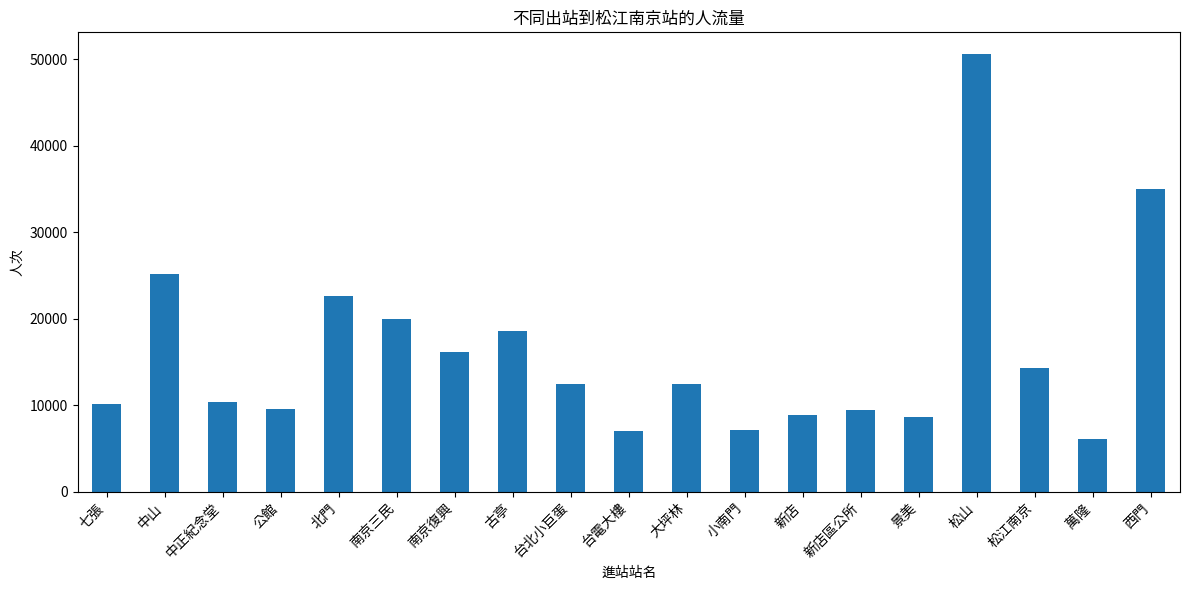

In [ ]:
import matplotlib.pyplot as plt

# Group data by '進站' and sum the '人次' for the entire dataset
station_counts = 松江南京.groupby('進站')['人次'].sum()

# Create the bar chart
plt.figure(figsize=(12, 6))
station_counts.plot(kind='bar')
plt.title('不同出站到松江南京站的人流量')
plt.xlabel('進站站名')
plt.ylabel('人次')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# 根據人次排序，由大到小

In [ ]:
sorted_df = 松江南京.sort_values(by='人次', ascending=False)
# 印出排序後的資料
sorted_df


,日期,時段,進站,出站,人次
3312662,2025-03-13,8,松山,松江南京,613
1423418,2025-03-06,8,松山,松江南京,595
3042770,2025-03-12,8,松山,松江南京,592
883634,2025-03-04,8,松山,松江南京,586
5201906,2025-03-20,8,松山,松江南京,585
...,...,...,...,...,...
4552394,2025-03-17,21,新店,松江南京,1
2381486,2025-03-09,20,小南門,松江南京,1
2380730,2025-03-09,20,大坪林,松江南京,1
2380406,2025-03-09,20,新店,松江南京,1


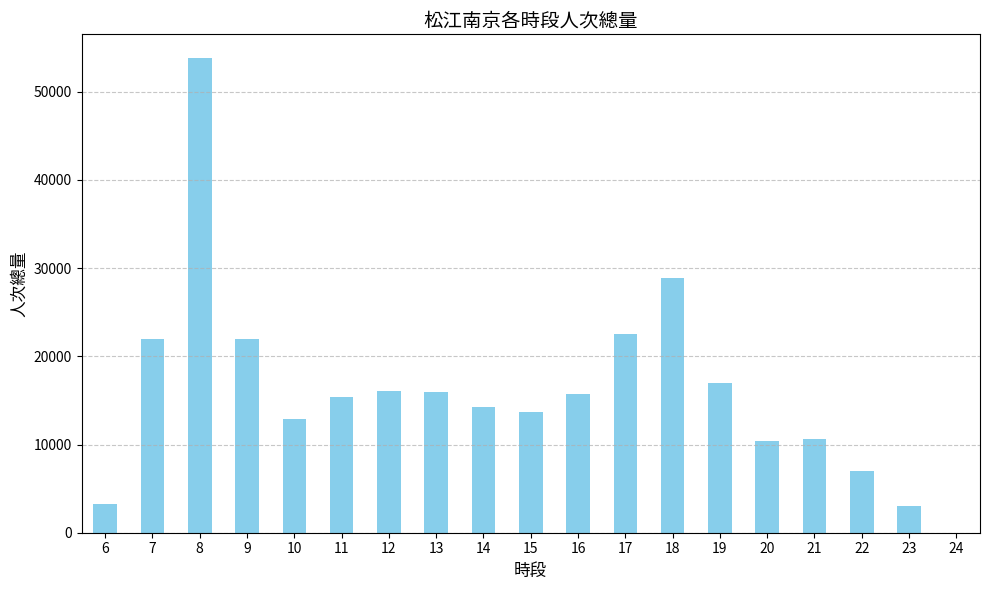

In [ ]:
人次總量 = 松江南京.groupby('時段')['人次'].sum().reindex(range(6, 25), fill_value=0)

# 繪製柱狀圖
plt.figure(figsize=(10, 6))
人次總量.plot(kind='bar', color='skyblue')
plt.title('松江南京各時段人次總量', fontsize=14)
plt.xlabel('時段', fontsize=12)
plt.ylabel('人次總量', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 顯示圖表
plt.show()